# Rencana &amp; Skema Projek Mini Berbasis Jupyter Notebook


# Tema :Analisis Nilai Mahasiswa

Proyek mini ini, yang berjudul Analisis Nilai Mahasiswa, merupakan produk akhir dari kerja tim Kelompok 11 kelas RA.

Implementasinya mengandalkan ekosistem data science modern, di mana Python digunakan untuk pemrosesan data, dan seluruh kode serta hasilnya dieksekusi serta didokumentasikan melalui Jupyter Notebook.

Berikut adalah nama dan NIM dari anggota Kelompok 9:
* Tobagus Ahmad Yogi  - 124400075
* DUTA RIZKY PRATAMA  - 124400027
* CHELSY ENIX ZEANVENTA  - 124400093

# 1. Persiapan Alat: Mengambil Library atau Import Library

Bagian ini berfungsi sebagai 'panggilan' atau 'pemasukan' tools yang akan kita gunakan untuk menganalisis data. Perintah import ini secara khusus membawa masuk library matplotlib. Anda bisa membayangkan library ini seperti sebuah kotak peralatan canggih yang berisi semua fungsi yang dibutuhkan untuk menggambar dan memvisualisasikan data.

# Mengapa matplotlib? ( mat plot lib )

Kita menggunakan library ini untuk Visualisasi Data—proses mengubah angka-angka dalam data menjadi grafik yang mudah dipahami (seperti batang atau garis). Ini sangat penting untuk menemukan pola tersembunyi.

Peringatan Penting (Instalasi): Seluruh proyek ini tidak akan berjalan jika matplotlib belum terpasang di sistem Anda. Pastikan Anda telah menjalankankan perintah instalasi (pip install matplotlib) di terminal sebelum menjalankan sel kode import ini.

In [1]:
import csv
import json
import matplotlib.pyplot as plt

# 2. Melakukan File Handling untuk Membaca CSV
Pada tahap ini, kita menerapkan teknik File Handling untuk menarik data nilai mahasiswa dari sumber eksternal. Kita akan memanggil fungsi read_csv() (asumsi penggunaan library pandas) dan menentukan path direktori data/nama_file.csv (ganti nama_file.csv dengan nama file Anda yang sebenarnya).

Tujuan utama dari langkah ini adalah untuk mengubah data tabular yang tersimpan dalam file CSV menjadi objek dataframe yang dapat dimanipulasi dan diproses oleh Python untuk analisis lebih lanjut.

In [96]:
mahasiswa_list = []
file_path = 'data/nilai_mahasiswa.csv'

try:
    with open(file_path, 'r', newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        
        for row in reader:
            mahasiswa_list.append(row)
            
    print(f"✅ Data dari '{file_path}' berhasil dimuat.")
    
except FileNotFoundError:
    print(f"❌ File CSV tidak ditemukan di jalur: '{file_path}'.")
    print("Pastikan file berada di lokasi yang benar.")
except Exception as e:
    print(f"Terjadi kesalahan saat memproses file: {e}")

✅ Data dari 'data/nilai_mahasiswa.csv' berhasil dimuat.


# 3.Tahap Pra-pemrosesan Data (Preprocessing)
Bagian ini merupakan langkah opsional namun sangat direkomendasikan dalam data preparation. Proses utama di sini adalah konversi tipe data.

Kita akan menerapkan perintah untuk mengubah kolom data yang saat ini berbentuk *string (teks)* menjadi tipe data *integer (bilangan bulat)*. Konversi ini mutlak diperlukan agar nilai-nilai tersebut dapat dioperasikan secara matematis (dihitung, dijumlahkan, dirata-ratakan) oleh Python. 

In [86]:
for m in mahasiswa_list:
    m['nilai_tugas'] = int(m['nilai_tugas'])
    m['nilai_kuis'] = int(m['nilai_kuis'])
    m['nilai_uts'] = int(m['nilai_uts'])

# 4.OOP (Object-Oriented Programming): Menekankan Pembagian Peran dan Struktur OOP
Kelas Student dipakai untuk menyimpan data setiap mahasiswa.

Kelas Analyzer digunakan untuk menghitung rata-rata, nilai max, dll.

In [87]:
class Mahasiswa:
    """Kelas untuk merepresentasikan data Mahasiswa dan nilainya."""
    def __init__(self, nama, tugas, kuis, uts):
        self.nama = nama
        self.nilai_tugas = tugas
        self.nilai_kuis = kuis
        self.nilai_uts = uts

    def hitung_rerata(self):
        """Menghitung rata-rata dari 3 nilai (tugas, kuis, uts)."""
        return (self.nilai_tugas + self.nilai_kuis + self.nilai_uts) / 3

class AnalisNilai:
    """Kelas untuk menganalisis nilai Mahasiswa dalam suatu daftar."""
    def __init__(self, data_mahasiswa_list): 
        self.daftar_mahasiswa = [
            Mahasiswa(
                nama=m['nama_mahasiswa'],
                tugas=m['nilai_tugas'],
                kuis=m['nilai_kuis'],
                uts=m['nilai_uts']
            )
            for m in data_mahasiswa_list
        ]

    def hitung_rerata_kelas(self):
        """Menghitung rata-rata kelas."""
        if not self.daftar_mahasiswa:
            return 0
        total_rerata = sum(mhs.hitung_rerata() for mhs in self.daftar_mahasiswa)
        return total_rerata / len(self.daftar_mahasiswa)

    def dapatkan_tertinggi(self):
        """Mencari Mahasiswa dengan nilai rata-rata tertinggi."""
        if not self.daftar_mahasiswa:
            return None
        tertinggi = max(self.daftar_mahasiswa, key=lambda mhs: mhs.hitung_rerata())
        return tertinggi

    def dapatkan_terendah(self):
        """Mencari Mahasiswa dengan nilai rata-rata terendah."""
        if not self.daftar_mahasiswa:
            return None
        terendah = min(self.daftar_mahasiswa, key=lambda mhs: mhs.hitung_rerata())
        return terendah

# 5. Converting OOP
Mengubah Data Dictionary menjadi Objek Student menggunakan fitur *Append*

Pertama Buat List objek Student dari mahasiswa_list yang sudah di-pre-process

Kedua Buat objek GradeAnalyzer dan jalankan analisis

In [88]:
student_objects = []
for m in mahasiswa_list:
    student_objects.append(Student(
        nama=m['nama_mahasiswa'],
        tugas=m['nilai_tugas'],
        kuis=m['nilai_kuis'],  
        uts=m['nilai_uts']
    ))

analyzer = GradeAnalyzer(student_objects)

# 6. Branching & Looping
Kita menampilkan keterangan lulus/tidak berdasarkan rata-rata. Jika rata-rata >= 75 maka LULUS.

In [89]:
for s in student_objects:
    rata = s.rata_total()
    if rata >= 75:
        status = "Lulus"
    else:
        status = "Tidak Lulus"


    print(s.nama, "- Rata-rata:", rata, "-", status)

Bella Fauzi - Rata-rata: 86.66666666666667 - Lulus
Pratama Hakim - Rata-rata: 84.66666666666667 - Lulus
Xavier Fatimah - Rata-rata: 83.0 - Lulus
Rizky Rahman - Rata-rata: 73.0 - Tidak Lulus
Indah Ramadhan - Rata-rata: 84.66666666666667 - Lulus
Joko Maulana - Rata-rata: 73.66666666666667 - Tidak Lulus
Chandra Yudha - Rata-rata: 87.0 - Lulus
Yuni Wulandari - Rata-rata: 80.66666666666667 - Lulus
Maya Setyawan - Rata-rata: 64.66666666666667 - Tidak Lulus
Ahmad Fitri - Rata-rata: 64.66666666666667 - Tidak Lulus
Elisa Melati - Rata-rata: 68.66666666666667 - Tidak Lulus
Qori Sari - Rata-rata: 74.0 - Tidak Lulus
Fikri Prasetyo - Rata-rata: 79.33333333333333 - Lulus
Naufal Putra - Rata-rata: 75.0 - Lulus
Lukman Lestari - Rata-rata: 95.0 - Lulus
Wulan Anjani - Rata-rata: 83.0 - Lulus
Bunga Permata - Rata-rata: 85.0 - Lulus
Citra Paramita - Rata-rata: 70.33333333333333 - Tidak Lulus
Zahra Prakasa - Rata-rata: 87.33333333333333 - Lulus
Dimas Santoso - Rata-rata: 86.33333333333333 - Lulus
Vito Dewi

# 7. Exception Handling
Contoh exception sederhana untuk input pengguna.

In [97]:
try:
    batas = int(input("Masukkan batas nilai rata-rata untuk filter: "))
except ValueError:
    print("Input harus berupa angka!")
    batas = 0

print("\nMahasiswa dengan rata-rata di atas", batas)
for s in student_objects:
    if s.rata_total() > batas:
        print(s.nama)

Masukkan batas nilai rata-rata untuk filter:  50



Mahasiswa dengan rata-rata di atas 50
Bella Fauzi
Pratama Hakim
Xavier Fatimah
Rizky Rahman
Indah Ramadhan
Joko Maulana
Chandra Yudha
Yuni Wulandari
Maya Setyawan
Ahmad Fitri
Elisa Melati
Qori Sari
Fikri Prasetyo
Naufal Putra
Lukman Lestari
Wulan Anjani
Bunga Permata
Citra Paramita
Zahra Prakasa
Dimas Santoso
Vito Dewi
Aditya Kurniawan
Sari Hadi
Dewi Puspita
Umi Aulia
Hendra Wijaya
Kartika Nugroho
Olivia Jaya
Tegar Cahya
Gita Susilo


# 8. Data Visualization atau Menamoilkan Data menggunakan Matplotlib 
Membuat grafik batang nilai rata-rata untuk semua mahasiswa.

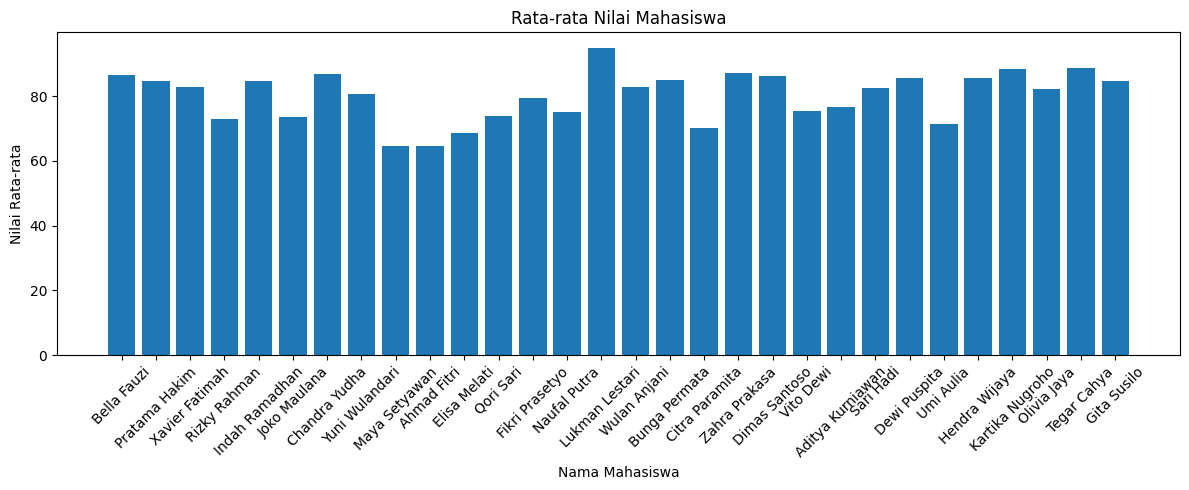

In [75]:
nama_mhs = [s.nama for s in student_objects]
rata_mhs = [s.rata_total() for s in student_objects]


plt.figure(figsize=(12,5))
plt.bar(nama_mhs, rata_mhs)
plt.xticks(rotation=45)
plt.title("Rata-rata Nilai Mahasiswa")
plt.xlabel("Nama Mahasiswa")
plt.ylabel("Nilai Rata-rata")
plt.tight_layout()
plt.show()

# Additional File Handling

Kita simpan hasil analisis ke file JSON dan log TXT kemudian 

Menyimpan nilai tertinggi & terendah ke file dalam format JSON

In [95]:
hasil = {
    "rata_kelas": analyzer.hitung_rata_kelas(),
    "nilai_tertinggi": analyzer.nilai_tertinggi().nama,
    "nilai_terendah": analyzer.nilai_terendah().nama
}


with open('output/hasil_analisis.json', 'w') as json_file:
    json.dump(hasil, json_file, indent=4)

# Menyimpan file LOG atau Logging atau hal yang terjadi saat kode ini dijalankan kedalam file berformat *TXT* atau plain text file.

In [93]:
with open('output/log_projek.txt', 'w') as log:
    log.write("Projek berhasil dijalankan!\n")
    log.write("Rata kelas: " + str(analyzer.hitung_rata_kelas()))